In [232]:
import csv
raw_data = []
data= []
with open('car.csv') as file:
    csvreader = csv.reader(file)
    for rows in csvreader:
        data.append(rows)

In [233]:
data[0]

['buying_price',
 'maintenance_price',
 'number_doors',
 'capacity',
 'luggage_boot_size',
 'safety_level',
 'class']

In [234]:
#print out all the possible labels
labels = []
for _ in range(len(data[0])):
    labels.append([])
    
print(labels)

for rows in data[1:]:
    for i in range(len(rows)):
        if rows[i] not in labels[i]:
            labels[i].append(rows[i])
print(labels)

[[], [], [], [], [], [], []]
[['very_high', 'high', 'medium', 'low'], ['very_high', 'high', 'medium', 'low'], ['two', 'three', 'four', '5_or_more'], ['two', 'four', '5_or_more'], ['small', 'medium', 'large'], ['low', 'medium', 'high'], ['unacceptable', 'acceptable', 'very_good', 'good']]


In [235]:
names = data[0]

In [236]:
names

['buying_price',
 'maintenance_price',
 'number_doors',
 'capacity',
 'luggage_boot_size',
 'safety_level',
 'class']

In [237]:
#part a: shuffle the data without labels
data = data[1:]
from sklearn.utils import shuffle
data = shuffle(data)

In [238]:
#(b)split the data
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2, train_size = 0.8)

0/1/2/3/4/5/6
for example its 3
3, 
[ 0, 1, 2, 3, 4]
[[],[],[],[],[]]

In [239]:
#total of 6 labels, split into 4 datasets, for each split more,... 
#part c: decision tree implementation

from math import log2, inf
#get information gain
def info_gain(parent_data, split_index):
    
    split_label = labels[split_index]
    splits = []
    splited_child_entropy_sum = []
    for _ in range(len(split_label)):
        splits.append([])
        splited_child_entropy_sum.append([0,0,0,0])
    
    result_label_sum = [0,0,0,0]
    for rows in parent_data:
        #child entropy for each instances of the split
        for x in range(len(split_label)):
            if rows[split_index] == split_label[x]:
                splits[x].append(rows)
                for i in range(len(splited_child_entropy_sum)):
                    if rows[-1] == labels[-1][i]:
                        splited_child_entropy_sum[x][i] += 1
                        break
                break
            
        
        
        #parent entropy sum calculation
        for i in range(len(result_label_sum)):
            if rows[-1] == labels[-1][i]:
                result_label_sum[i] += 1
                break
            
    parent_entropy = 0
    total_values_in_parent_data = len(parent_data)
    for i in result_label_sum:
        parent_entropy += -1 * i / total_values_in_parent_data * log2(i/total_values_in_parent_data) if i != 0 else 0
       
    # return splited_child_entropy_sum 
    #child entropy
    child_entropy = 0
    for n in range(len(split_label)):
        I = 0
        for m in splited_child_entropy_sum[n]:
            I += -1 * m / len(splits[n]) * log2(m / len(splits[n])) if m != 0 else 0
        child_entropy += len(splits[n])/len(parent_data)*I
            
    return parent_entropy - child_entropy, splits

#get the split_index based on whichever index has the most information gain
def get_split_index(parent_data, available_labels):
    max_info = -inf
    best_split_index = -1
    best_splits = []

    for feature_index in available_labels:
        if feature_index == -1:
            # Feature was already used
            continue
        info, candidate_splits = info_gain(parent_data, feature_index)
        if info > max_info:
            max_info = info
            best_split_index = feature_index
            best_splits = candidate_splits

    return best_split_index, best_splits, max_info


In [240]:
class Node:
    def __init__(self, data):
        self.data = data
        self.children = []
    def add_child(self, child):
        self.children.append(child)

In [241]:
def majority_label(data_subset):
    label_counts = {}
    for row in data_subset:
        label_counts[row[-1]] = label_counts.get(row[-1], 0) + 1
    return max(label_counts, key=label_counts.get)

In [242]:
def build_decision_tree(remaining_labels, parent_data):
    
    #stopping criteria
    if len(parent_data) == 0:
        return Node('no data in the split')
    
    if all(remaining_labels) == -1:
        return Node(majority_label(parent_data))
    
    potential_label = parent_data[0][-1]
    if all(row[-1] == potential_label for row in parent_data):
        leaf_node = Node(potential_label)
        return leaf_node
            
    split_index, splits, info = get_split_index(parent_data, remaining_labels)
    
    if info <= 0:
        return Node(majority_label(parent_data))
    
    node = Node(names[split_index])
    
    new_remaining_labels = remaining_labels[:]
    new_remaining_labels[split_index] = -1
    
    for split in splits:
        child_subtree = build_decision_tree(new_remaining_labels, split)
        if child_subtree is not None:
            node.add_child(child_subtree)
        else:
            node.add_child(Node(majority_label(parent_data)))
    
    return node

In [243]:
res = build_decision_tree([0,1,2,3,4],train)

In [244]:
def predict(row, node):
    if not node.children:  
        return node.data

    feature_name = node.data
    feature_index = names.index(feature_name)
    feature_value = row[feature_index]
    possible_values = labels[feature_index]
    if feature_value not in possible_values:
        return node.data
    child_idx = possible_values.index(feature_value)
    if child_idx >= len(node.children):
        return node.data
    return predict(row, node.children[child_idx])


In [271]:
#Q2.1
from sklearn.utils import shuffle
import csv
from sklearn.model_selection import train_test_split
from math import log2, inf

def train_and_test():
    data= []
    with open('car.csv') as file:
        csvreader = csv.reader(file)
        for rows in csvreader:
            data.append(rows)
            
    labels = []
    for _ in range(len(data[0])):
        labels.append([])
        
    for rows in data[1:]:
        for i in range(len(rows)):
            if rows[i] not in labels[i]:
                labels[i].append(rows[i])
                
    names = data[0]

    data = data[1:]
    data = shuffle(data)

    train, test = train_test_split(data, test_size = 0.2, train_size = 0.8)

    #get information gain
    def info_gain(parent_data, split_index):
        
        split_label = labels[split_index]
        splits = []
        splited_child_entropy_sum = []
        for _ in range(len(split_label)):
            splits.append([])
            splited_child_entropy_sum.append([0,0,0,0])
        
        result_label_sum = [0,0,0,0]
        for rows in parent_data:
            #child entropy for each instances of the split
            for x in range(len(split_label)):
                if rows[split_index] == split_label[x]:
                    splits[x].append(rows)
                    for i in range(len(splited_child_entropy_sum)):
                        if rows[-1] == labels[-1][i]:
                            splited_child_entropy_sum[x][i] += 1
                            break
                    break
                
            
            
            #parent entropy sum calculation
            for i in range(len(result_label_sum)):
                if rows[-1] == labels[-1][i]:
                    result_label_sum[i] += 1
                    break
                
        parent_entropy = 0
        total_values_in_parent_data = len(parent_data)
        for i in result_label_sum:
            parent_entropy += -1 * i / total_values_in_parent_data * log2(i/total_values_in_parent_data) if i != 0 else 0
        
        # return splited_child_entropy_sum 
        #child entropy
        child_entropy = 0
        for n in range(len(split_label)):
            I = 0
            for m in splited_child_entropy_sum[n]:
                I += -1 * m / len(splits[n]) * log2(m / len(splits[n])) if m != 0 else 0
            child_entropy += len(splits[n])/len(parent_data)*I
                
        return parent_entropy - child_entropy, splits

    #get the split_index based on whichever index has the most information gain
    def get_split_index(parent_data, available_labels):
        max_info = -inf
        best_split_index = -1
        best_splits = []

        for feature_index in available_labels:
            if feature_index == -1:
                # Feature was already used
                continue
            info, candidate_splits = info_gain(parent_data, feature_index)
            if info > max_info:
                max_info = info
                best_split_index = feature_index
                best_splits = candidate_splits

        return best_split_index, best_splits, max_info

    class Node:
        def __init__(self, data):
            self.data = data
            self.children = []
        def add_child(self, child):
            self.children.append(child)
            
    def majority_label(data_subset):
        label_counts = {}
        for row in data_subset:
            label_counts[row[-1]] = label_counts.get(row[-1], 0) + 1
        return max(label_counts, key=label_counts.get)
    
    def build_decision_tree(remaining_labels, parent_data, depth):
    
        #stopping criteria
        if len(parent_data) == 0:
            return Node('no data in the split')
        
        if all(remaining_labels) == -1:
            return Node(majority_label(parent_data))
        
        potential_label = parent_data[0][-1]
        if all(row[-1] == potential_label for row in parent_data):
            leaf_node = Node(potential_label)
            return leaf_node
                
        split_index, splits, info = get_split_index(parent_data, remaining_labels)
        
        if info <= 0:
            return Node(majority_label(parent_data))
        
        node = Node(names[split_index])
        
        new_remaining_labels = remaining_labels[:]
        new_remaining_labels[split_index] = -1
        
        for split in splits:
            print(depth)
            child_subtree = build_decision_tree(new_remaining_labels, split, depth + 1)
            if child_subtree is not None:
                node.add_child(child_subtree)
            else:
                node.add_child(Node(majority_label(parent_data)))
        
        return node

    decision_tree = build_decision_tree([0,1,2,3,4,5],train, 0)

    def predict(row, node):
        if not node.children:  
            return node.data

        feature_name = node.data
        feature_index = names.index(feature_name)
        feature_value = row[feature_index]
        possible_values = labels[feature_index]
        if feature_value not in possible_values:
            return node.data
        child_idx = possible_values.index(feature_value)
        if child_idx >= len(node.children):
            return node.data
        return predict(row, node.children[child_idx])
    
    train_co , test_co = 0,0
    for row in train:
        prediction = predict(row, decision_tree)
        actual = row[-1]
        if prediction == actual:
            train_co += 1

    train_accuracy = train_co / len(train)
        
    for row in test:
        prediction = predict(row, decision_tree)
        actual = row[-1]
        if prediction == actual:
            test_co += 1

    test_accuracy = test_co / len(test)
    
    if test_accuracy > 1.0 or train_accuracy > 1.0:
        print('ur genius')
        
    return train_accuracy, test_accuracy

In [272]:
train_accus, test_accus = [],[]
for _ in range(100):
    tr, te = train_and_test()
    train_accus.append(tr)
    test_accus.append(te)

0
0
1
1
2
3
3
3
4
4
4
4
3
4
4
4
4
2
3
4
4
4
5
5
5
5
4
5
5
5
5
3
4
4
4
5
5
5
5
4
5
5
5
5
3
4
5
5
5
5
4
5
5
5
5
4
4
5
5
5
5
3
4
5
5
5
5
4
4
5
5
5
5
4
5
5
5
5
2
3
4
4
4
4
3
4
4
4
4
3
4
4
4
4
3
4
4
4
4
1
2
3
3
3
4
4
4
5
5
5
5
4
3
4
4
5
5
5
5
4
5
5
5
5
4
5
5
5
5
2
3
4
4
4
5
5
5
5
4
5
5
5
5
3
4
4
5
5
5
5
4
5
5
5
5
4
3
4
5
5
5
5
4
4
4
5
5
5
5
3
4
5
5
5
5
4
4
5
5
5
5
4
5
5
5
5
2
3
4
4
4
4
3
4
4
4
4
3
4
4
4
4
3
4
4
4
4
0
1
1
2
3
3
3
3
2
3
3
3
3
2
3
3
3
4
4
5
5
5
5
4
3
4
4
4
2
3
3
4
4
4
3
4
4
5
5
5
5
4
3
4
4
5
5
5
5
4
1
2
3
3
4
5
5
5
5
4
4
4
5
5
5
5
3
4
5
5
5
5
4
5
5
5
5
4
5
5
5
5
4
5
5
5
5
3
4
5
5
5
5
4
5
5
5
5
4
5
5
5
5
4
5
5
5
5
2
3
4
4
4
4
3
4
4
4
4
3
4
4
4
5
5
5
5
4
5
5
5
5
3
4
4
5
5
5
5
4
5
5
5
5
4
5
5
5
5
2
3
4
4
4
4
3
4
4
4
4
3
4
4
4
4
3
4
4
4
4
0
0
1
1
2
3
3
3
4
4
4
4
3
4
4
4
4
2
3
4
4
4
4
5
5
5
5
3
4
4
5
5
5
5
4
5
5
5
5
4
3
4
5
5
5
5
4
5
5
5
5
4
4
5
5
5
5
3
4
5
5
5
5
4
4
5
5
5
5
4
5
5
5
5
2
3
4
4
4
4
3
4
4
4
4
3
4
4
4
4
3
4
4
4
4
1
2
3
3
3
4
4
4
4
5
5
5
5
3
4
4
4
5
5
5
5
4
5
5
5
5
2
3


In [273]:
import matplotlib.pyplot as plt
from collections import Counter

def draw_graphs(d):
    plt.hist(d, edgecolor = 'black')
    plt.xlabel("Accuracy")
    plt.ylabel("Frequency of Accuracy")
    plt.show()


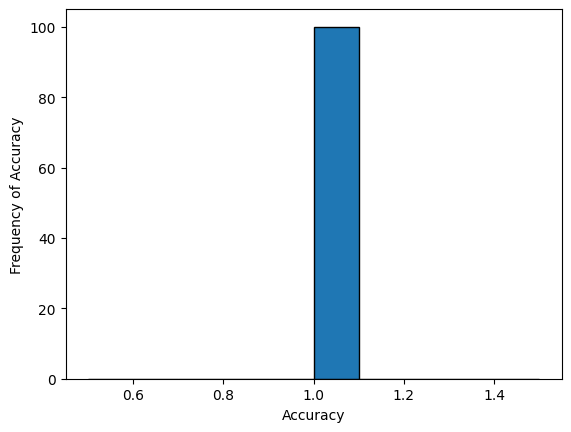

In [274]:
draw_graphs(train_accus)

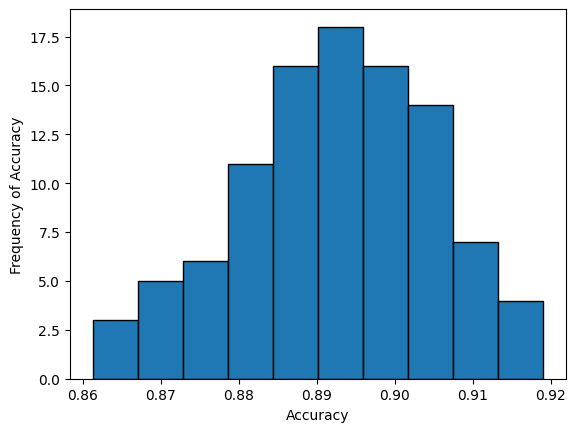

In [275]:
draw_graphs(test_accus)